In [42]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [43]:
"""Load Files"""
filenames = ["_piezo","_piezo2"]
b20 = []
for i,filename in enumerate(filenames):
    if i == 0:
        b20 = np.loadtxt("./Data/b20_artillery"+filename+".txt",dtype = float)
        b20_norm = np.loadtxt("./Data/norm_b20_artillery"+filename+".txt",dtype = float) 
        truths = np.loadtxt("./Data/truths_artillery"+filename+".txt",dtype = float)
    else:
        b20 = np.concatenate((b20,np.loadtxt("./Data/b20_artillery"+filename+".txt",dtype = float)))
        b20_norm = np.concatenate((b20_norm,np.loadtxt("./Data/norm_b20_artillery"+filename+".txt",dtype = float)))
        truths = np.concatenate((truths,np.loadtxt("./Data/truths_artillery"+filename+".txt",dtype = float)))
print(f"Length b20: {len(b20)}")
print(b20[0])
print(f"Length truths: {len(truths)}")
print(truths[0])
print(f"Length b20_norm: {len(b20_norm)}")
print(b20_norm[0])


if(len(b20) != len(truths)):
    raise Exception("Arrays not of equal length")

Length b20: 99790
[  64.05  -93.6   -50.58   29.51   71.4  -147.15  -50.09   28.54 -673.05
  930.15 -725.52   27.19  -32.25 2282.85   47.92   27.06  -89.1    71.85
  -96.56   28.72]
Length truths: 99790
[-1. -1.  0.]
Length b20_norm: 20000
[  58.35 -100.5   -59.53   29.42   63.15 -142.65  -51.06   28.65 -671.55
  936.   -721.16   27.3   -33.3  2285.55   55.9    27.19  -87.3    73.65
 -100.91   28.94]


In [44]:
"""Setup Data"""
b15_norm = [np.concatenate((b[0:3],b[4:7],b[8:11],b[12:15],b[16:19])) for b in b20_norm]#We only care about 1,2,3 (xyz) not 4 (T) per sensor
b15 = [np.concatenate((b[0:3],b[4:7],b[8:11],b[12:15],b[16:19])) for b in b20]
print(f"b20[0]: {len(b20[0])}, {b20[0]}")
print(f"b15[0]: {len(b15[0])}, {b15[0]}")
#print(f"b15_norm[0]: {len(b15_norm[0])}, {b15_norm[0]}")

#Setup normalization
norm_val = []
for i in range(len(b15_norm[0])):
    mean = 0
    for count,b in enumerate(b15_norm):
        mean += b[i]
    mean = mean/count
    norm_val.append(mean)
print(f"Normalization Values: {len(norm_val)},{norm_val}")

b15 = [b/norm_val for b in b15]
b15_norm = [b/norm_val for b in b15_norm]
print(f"b15 (normalized) {b15[3]}")
print(f"b15 (normalization array) {b15_norm[0]}")#Should all be around 1


test_truths = [tr[2] for tr in truths]
if(len(b15) != len(truths)):
    raise Exception("Arrays not of equal length")

b20[0]: 20, [  64.05  -93.6   -50.58   29.51   71.4  -147.15  -50.09   28.54 -673.05
  930.15 -725.52   27.19  -32.25 2282.85   47.92   27.06  -89.1    71.85
  -96.56   28.72]
b15[0]: 15, [  64.05  -93.6   -50.58   71.4  -147.15  -50.09 -673.05  930.15 -725.52
  -32.25 2282.85   47.92  -89.1    71.85  -96.56]
Normalization Values: 15,[59.03253412670669, -96.54185709285466, -54.94460573028681, 63.81561328066438, -145.45234261713037, -47.92693034651731, -667.1735986799345, 929.134126706332, -738.6036371818561, -43.65926296314813, 2267.8403245162303, 85.76106355317786, -87.67195859792993, 73.97195359767962, -98.38225061253074]
b15 (normalized) [0.89696302 0.94156051 1.07035075 1.18231254 0.93948298 1.11586533
 1.0088079  1.00416073 0.97146827 0.81769589 1.00549407 0.59817355
 1.026554   0.96523069 0.93472145]
b15 (normalization array) [0.988438   1.04099924 1.08345486 0.98956974 0.9807336  1.0653718
 1.00655961 1.00738954 0.97638295 0.76272474 1.00780905 0.65181095
 0.99575738 0.99564763 

In [45]:
"""Cleanup outliers"""
max_N =100 #Cutoff heigt

#print(np.where(np.array(test_truths) > max_N)[0])
print("Outliers: ",len(np.where(np.array(test_truths) > max_N)[0]))
#print(np.where(np.array(test_truths) == 0)[0])
#print("Zeros: ",len(np.where(np.array(test_truths) == 0)[0]))
for i in range(3):
    print(truths[np.where(np.array(test_truths) == 0)[0][i]])

print("---------------")
print(f"B15 Original: ",len(b15))
b15 = [b15[i]  for i,t in enumerate(test_truths) if t<max_N]
truths = [truths[i]  for i,t in enumerate(test_truths) if t<max_N]
test_truths = [tr[2] for tr in truths]
truths = [truths[i] if t > 0 else [10,10,0] for i,t in enumerate(test_truths)]
test_truths = [tr[2] for tr in truths]

for i in range(3):
    print(truths[np.where(np.array(test_truths) == 0)[0][i]])

print(f"B15 Clean: ", len(b15))
if(len(b15) != len(truths)) or (len(b15) != len(test_truths)):
    raise Exception("Arrays not of equal length")

Outliers:  41
[-1. -1.  0.]
[-1. -1.  0.]
[-1. -1.  0.]
---------------
B15 Original:  99790
[10, 10, 0]
[10, 10, 0]
[10, 10, 0]
B15 Clean:  99730


norm_to_append = int(len(b15)/20)
if False:
    b15 = np.concatenate((b15,b15_norm[:norm_to_append]))#Append normalization values as not touching
    null_truths = np.full([len(b15_norm[:norm_to_append]),3],0)
    truths = np.concatenate((truths,null_truths))
    print(f"Len Full b15: {len(b15)}")
    

test_truths = [tr[2] for tr in truths]
if(len(b15) != len(truths)):
    raise Exception("Arrays not of equal length")
print(truths[-1:])

In [46]:
x = [[b[0] for b in b15],[b[3] for b in b15],[b[6] for b in b15],[b[9] for b in b15],[b[12] for b in b15]]
y = [[b[1] for b in b15],[b[4] for b in b15],[b[7] for b in b15],[b[10] for b in b15],[b[13] for b in b15]]
z = [[b[2] for b in b15],[b[5] for b in b15],[b[8] for b in b15],[b[11] for b in b15],[b[14] for b in b15]]

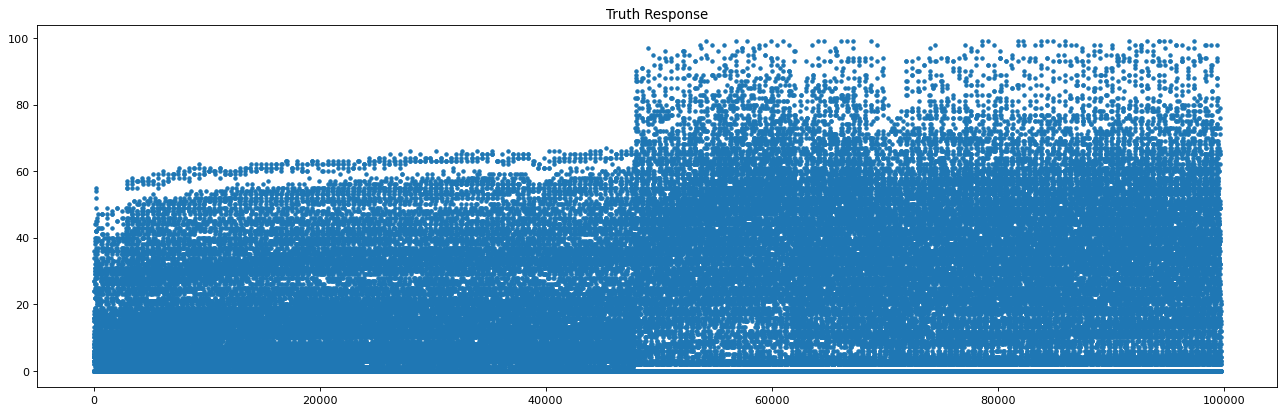

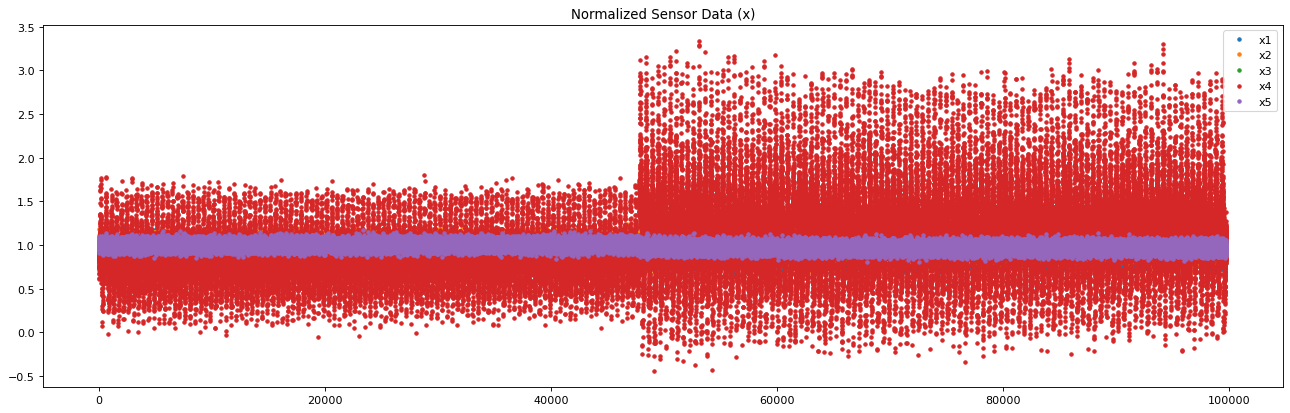

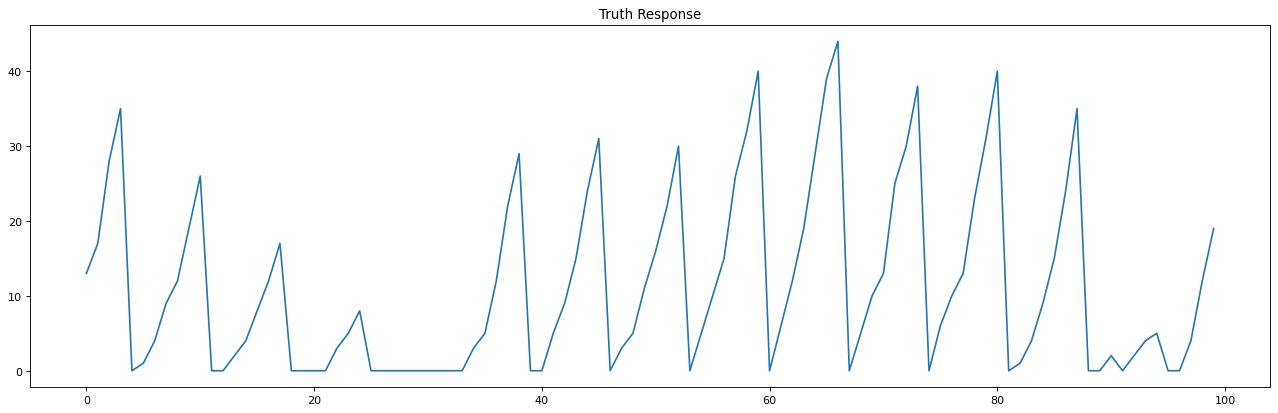

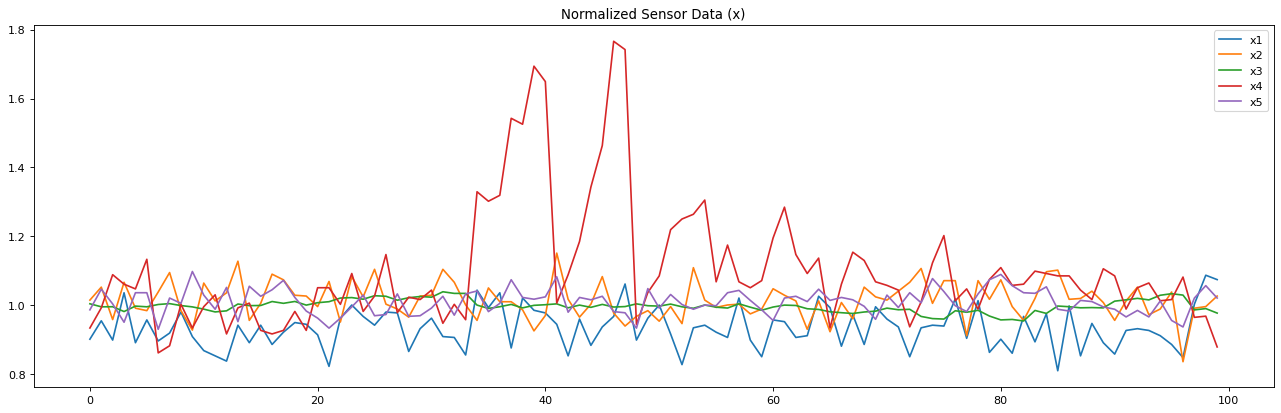

In [47]:
#Plot to secure
plt.figure(figsize=(20,6),dpi=80)
plt.plot(test_truths,".")
plt.title("Truth Response")
plt.show()

plt.figure(figsize=(20,6),dpi=80)
plt.plot(x[0],".",label="x1")
plt.plot(x[1],".",label="x2")
plt.plot(x[2],".",label="x3")
plt.plot(x[3],".",label="x4")
plt.plot(x[4],".",label="x5")
plt.legend()
plt.title("Normalized Sensor Data (x)")

plt.figure(figsize=(20,6),dpi=80)
plt.plot(test_truths[100:200])
plt.title("Truth Response")
plt.show()

plt.figure(figsize=(20,6),dpi=80)
plt.plot(x[0][100:200],label="x1")
plt.plot(x[1][100:200],label="x2")
plt.plot(x[2][100:200],label="x3")
plt.plot(x[3][100:200],label="x4")
plt.plot(x[4][100:200],label="x5")
plt.legend()
plt.title("Normalized Sensor Data (x)")
plt.show()

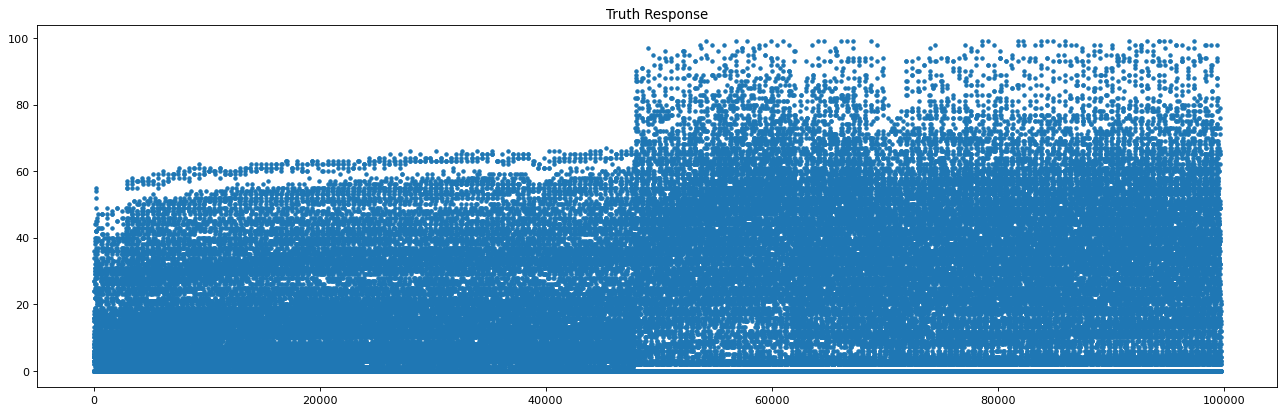

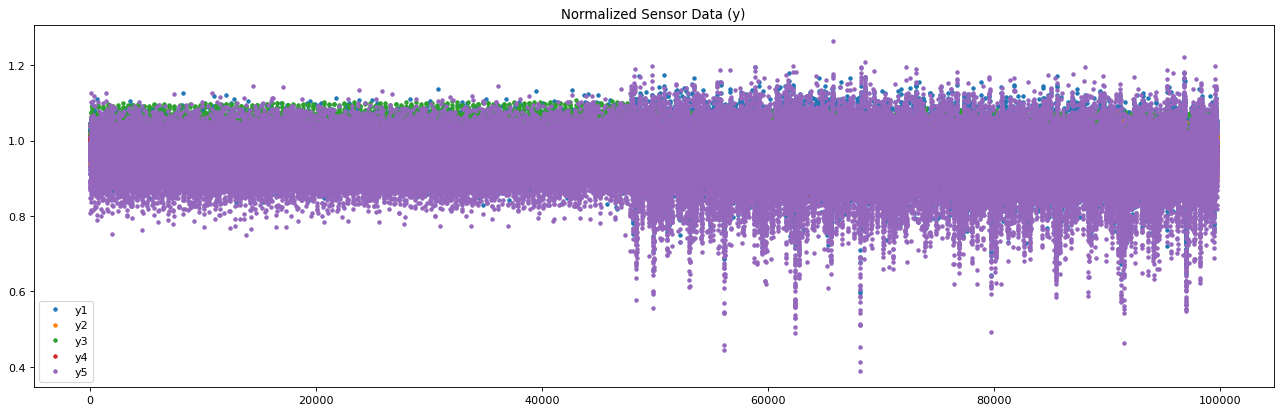

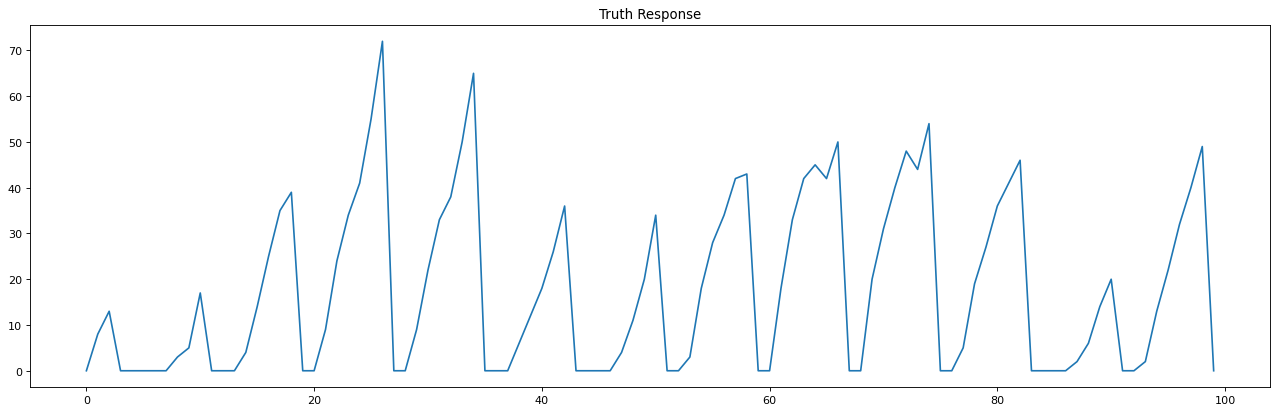

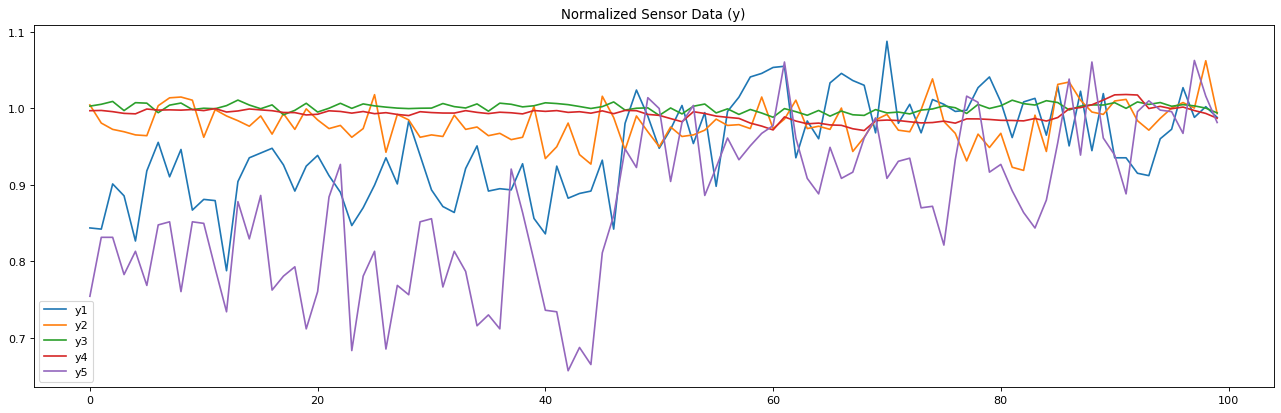

In [48]:
#y
plt.figure(figsize=(20,6),dpi=80)
plt.plot(test_truths,".")
plt.title("Truth Response")
plt.show()

plt.figure(figsize=(20,6),dpi=80)
plt.plot(y[0],".",label="y1")
plt.plot(y[1],".",label="y2")
plt.plot(y[2],".",label="y3")
plt.plot(y[3],".",label="y4")
plt.plot(y[4],".",label="y5")
plt.legend()
plt.title("Normalized Sensor Data (y)")
plt.show()

pos = int(len(truths)/2)
plt.figure(figsize=(20,6),dpi=80)
plt.plot(test_truths[pos:pos+100])
plt.title("Truth Response")
plt.show()

plt.figure(figsize=(20,6),dpi=80)
plt.plot(y[0][pos:pos+100],label="y1")
plt.plot(y[1][pos:pos+100],label="y2")
plt.plot(y[2][pos:pos+100],label="y3")
plt.plot(y[3][pos:pos+100],label="y4")
plt.plot(y[4][pos:pos+100],label="y5")
plt.legend()
plt.title("Normalized Sensor Data (y)")
plt.show()

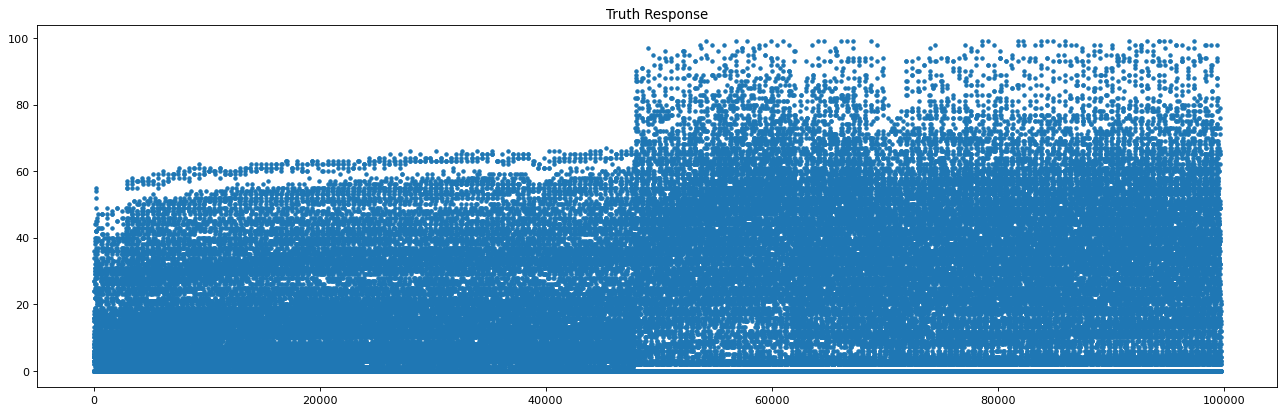

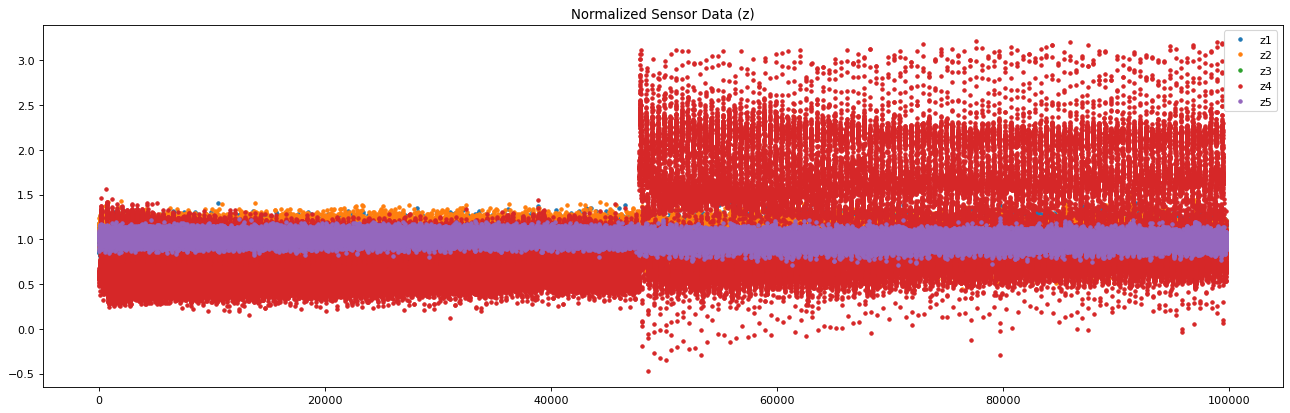

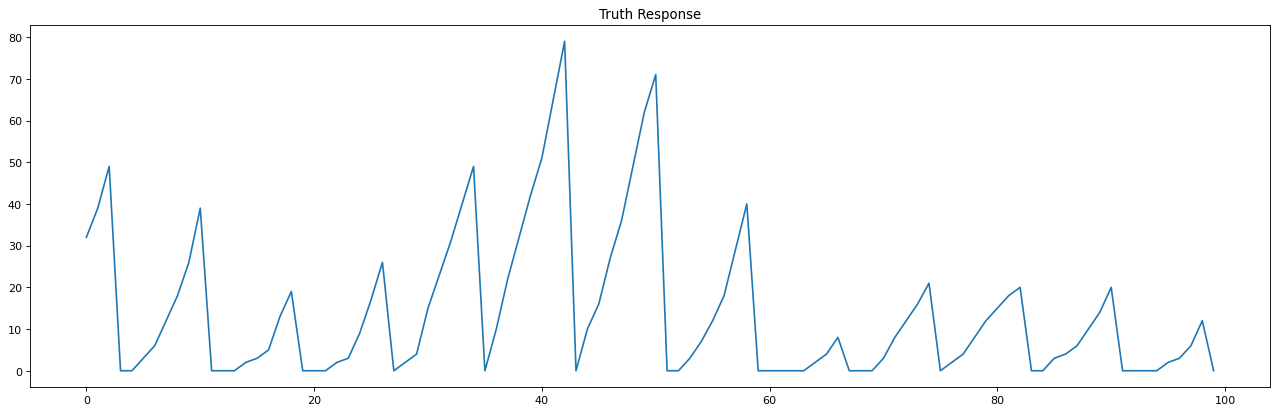

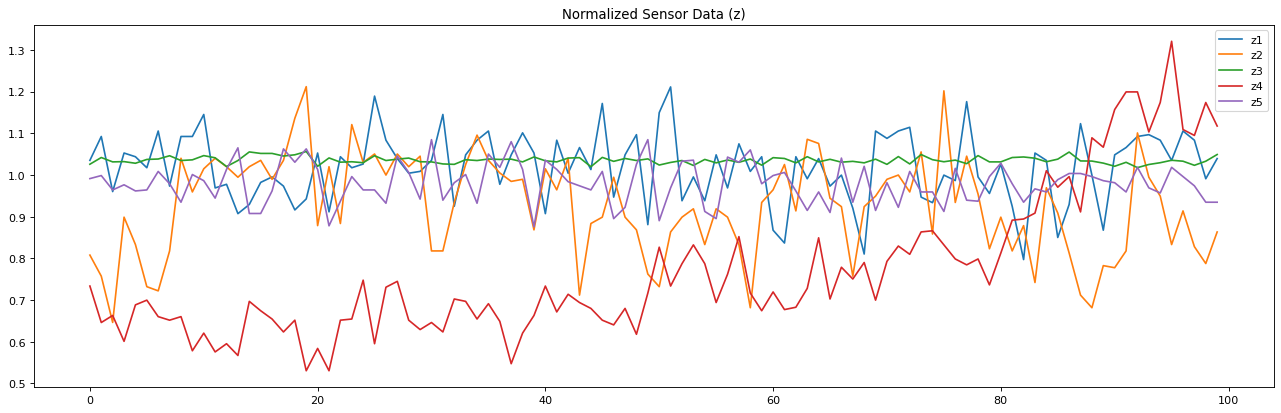

In [49]:
#z
plt.figure(figsize=(20,6),dpi=80)
plt.plot(test_truths,".")
plt.title("Truth Response")
plt.show()

plt.figure(figsize=(20,6),dpi=80)
plt.plot(z[0],".",label="z1")
plt.plot(z[1],".",label="z2")
plt.plot(z[2],".",label="z3")
plt.plot(z[3],".",label="z4")
plt.plot(z[4],".",label="z5")
plt.legend()
plt.title("Normalized Sensor Data (z)")
plt.show()

plt.figure(figsize=(20,6),dpi=80)
plt.plot(test_truths[-100:])
plt.title("Truth Response")
plt.show()
plt.figure(figsize=(20,6),dpi=80)
plt.plot(z[0][-100:],label="z1")
plt.plot(z[1][-100:],label="z2")
plt.plot(z[2][-100:],label="z3")
plt.plot(z[3][-100:],label="z4")
plt.plot(z[4][-100:],label="z5")
plt.legend()
plt.title("Normalized Sensor Data (z)")
plt.show()

In [50]:
#Model:
import os

import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Function

def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight.data,nonlinearity='relu')
        
class simpleMLP(nn.Module):
    def __init__(self, n_input, n_output, hidden_dims=[64,64], 
        activation_fn = nn.Tanh, output_activation = None):
        super(simpleMLP,self).__init__()
        self.n_input = n_input
        self.n_output = n_output
        
        layer_dims = [n_input] + hidden_dims + [n_output]
        layers = []
        
        for d in range(len(layer_dims)-1):
            layers.append(nn.Linear(layer_dims[d], layer_dims[d+1], bias=False))
            if d < len(layer_dims) - 2:
                layers.append(activation_fn())
        
        if output_activation is not None:
            layers.append(output_activation())
        for l in layers:
            initialize_weights(l)
        self.model = nn.Sequential(*layers)
        
        
            
    def forward(self, inputs):
        return self.model(inputs)

class vanilla_model(nn.Module):
    def __init__(self, n_input, feature_dim=20, feat_hidden=[64,64], activation_fn=nn.Tanh,
        feat_activation=None, output_hidden=[64,64],output_activation=None,
        pred_Fz=True, pred_Fxy=False):
        super(vanilla_model, self).__init__()
        self.n_input = n_input
        self.n_output = 2 + int(pred_Fz) + 2*int(pred_Fxy)
        self.feature_dim = feature_dim
        self.feat_model = simpleMLP(n_input=n_input, n_output=feature_dim, 
            hidden_dims=feat_hidden, activation_fn=activation_fn, 
            output_activation=feat_activation
        )
        self.output_model = simpleMLP(feature_dim, self.n_output, hidden_dims=output_hidden,
            activation_fn=activation_fn, output_activation=output_activation)

    def forward(self, sens):
        return self.output_model(self.get_feature(sens))

    def get_feature(self, sens):
        return self.feat_model(sens)
    
    def get_out_from_feature(self, feature):
        return self.output_model(feature)

In [51]:
#Setup
model = vanilla_model(15, feature_dim=40, feat_hidden=[200,200], activation_fn=nn.ReLU, output_hidden=[200,200],
                            output_activation=nn.ReLU)

#, feat_activation = nn.ReLU
#model.load_state_dict(torch.load("./Data/working_model_1"))
#model.load_state_dict(torch.load("./Data/model50k"))
print(model.eval())
#Setup Loader & Tensor 

vanilla_model(
  (feat_model): simpleMLP(
    (model): Sequential(
      (0): Linear(in_features=15, out_features=200, bias=False)
      (1): ReLU()
      (2): Linear(in_features=200, out_features=200, bias=False)
      (3): ReLU()
      (4): Linear(in_features=200, out_features=40, bias=False)
    )
  )
  (output_model): simpleMLP(
    (model): Sequential(
      (0): Linear(in_features=40, out_features=200, bias=False)
      (1): ReLU()
      (2): Linear(in_features=200, out_features=200, bias=False)
      (3): ReLU()
      (4): Linear(in_features=200, out_features=3, bias=False)
      (5): ReLU()
    )
  )
)


In [52]:
#Setup Loader:
batch_size = 250
train_dataset = []
test_dataset = []
for i,inputs in enumerate(b15):
    single_set = [torch.tensor(inputs,dtype=torch.float32),torch.tensor(truths[i],dtype=torch.float32)]
    if not np.random.randint(10) == 9:
        train_dataset.append(single_set)
    else:
        test_dataset.append(single_set)
        
        
print("Training Set: ",len(train_dataset))
print("Testing Set: ",len(test_dataset))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,shuffle=True, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,shuffle=True, batch_size = batch_size)

Training Set:  89739
Testing Set:  9991


In [53]:
examples = iter(train_loader)
example_data, example_targets = examples.next()
print(example_data[0])
print(example_targets[0])

tensor([0.9427, 0.8810, 1.2553, 1.1847, 0.9931, 1.0049, 1.0151, 0.9893, 1.0527,
        1.3537, 0.9784, 0.5051, 0.9222, 0.7868, 1.0823])
tensor([10., 10.,  0.])


Epoch [1], Step [359/359], Loss: 0.60706
Epoch [6], Step [359/359], Loss: 0.50433
Epoch [11], Step [359/359], Loss: 0.47803
Epoch [16], Step [359/359], Loss: 0.46212
Done, final Loss: 0.46212, in 15 Epochs


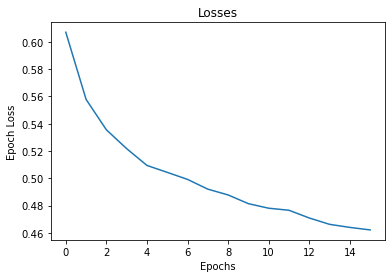

In [54]:
"""Train Model"""
num_epochs = 600
#loss & optimizer
learning_rate = 0.001

criterion = torch.nn.MSELoss()
#optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate,momentum = 0.9)
optimizer =  torch.optim.Adam(model.parameters(), lr=learning_rate) 

n_total_steps = len(train_loader)
previous_loss = 1
losses = []
overfitting = 0
for epoch in range(num_epochs):
    train_loss = 0
    for i, (b, labels) in enumerate(train_loader):  
        optimizer.zero_grad()
        
        #Forward Pass
        outputs = model(b)
        loss = criterion(outputs, labels)
        # Backward and optimize
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        #print(i)
        # if (i+1) % 100 == 0:
    epoch_loss = round(train_loss/len(train_dataset),5)
    if epoch%5 == 0:
        print(f'Epoch [{epoch+1}], Step [{i+1}/{n_total_steps}], Loss: {epoch_loss}')
    delta_loss = previous_loss-epoch_loss
    if delta_loss < 0.01*epoch_loss+0.0001:
        overfitting += 1
        #print(f"Overfitting begun ({overfitting})")
    else:
        overfitting = 0
    losses.append(epoch_loss)
    previous_loss = epoch_loss
    if overfitting == 3:
        print(f"Done, final Loss: {epoch_loss}, in {epoch} Epochs")
        break
plt.plot(losses)
plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Epoch Loss")
plt.show()

In [55]:
###### from sklearn.metrics import mean_squared_error

sum_MSE = 0
check = len(test_dataset)
correct_XY = 0
correct_F = 0
correct = 0


for i in range(check):        
    label = test_dataset[i][1].numpy()
    output = model(test_dataset[i][0]).detach().numpy()
    MSE_XY = mean_squared_error(output[:2], label[:2], squared=True)
    MSE_F  = (output[2] - label[2])**2
    MSE = mean_squared_error(output, label, squared=True)
    sum_MSE += MSE
    ran = np.random.randint(250)
    

    if MSE < 1:
        correct += 1
        if ran == 1:
            print(f"[Correct XYF] Label {label} - Output {output}")
            print("MSE: ",MSE)
    elif MSE_XY < 1:
        correct_XY += 1
        if ran == 1:
            print(f"[Correct XY] Label {label} - Output {output}")
            print("MSE: ",MSE_XY)
    elif MSE_F < 0.5:
        correct_F += 1
        if ran == 1:
            print(f"[Correct F] Label {label} - Output {output}")
            print("MSE: ",MSE_F)
    else:
        if ran == 1:
            print(f"[Incorrect] Label {label} - Output {output}")
            print("MSE: ",MSE)
    #print("________________")
    

MSE = sum_MSE/check
print("Final MSE:", MSE)
print(f"Successes: {correct}/{check} = {(correct/check)*100}%")
print(f"XY Sucess: {correct_XY}/{check} = {(correct_XY/check)*100}%")
print(f"F Sucess: {correct_F}/{check} = {(correct_F/check)*100}%")

[Incorrect] Label [ 6.33 14.78 10.  ] - Output [ 9.815153  13.932777   3.6608915]
MSE:  17.68279
[Correct XY] Label [10. 10.  0.] - Output [10.135832  10.194204   5.0752745]
MSE:  0.028082805
[Correct XY] Label [12.67  8.44 28.  ] - Output [12.064518  9.549555  9.831839]
MSE:  0.7988607
[Correct XY] Label [12.67  4.22 22.  ] - Output [12.410391  5.189024 15.952473]
MSE:  0.50320244
[Incorrect] Label [ 2.11 10.56  1.  ] - Output [7.239028 9.509403 7.29703 ]
MSE:  22.354425
[Incorrect] Label [10. 10.  0.] - Output [11.449936 10.659876  5.676325]
MSE:  11.586139
[Incorrect] Label [10.56  8.44 24.  ] - Output [10.34561    5.9804378 16.686043 ]
MSE:  19.863127
[Incorrect] Label [10. 10.  0.] - Output [11.648186  9.509811  9.469967]
MSE:  30.879026
[Incorrect] Label [12.67  6.33 49.  ] - Output [11.38246    5.6274185 22.01831  ]
MSE:  243.38763
[Correct XY] Label [10. 10.  0.] - Output [9.519983 9.2286   5.871661]
MSE:  0.41273737
[Incorrect] Label [ 8.44  0.   39.  ] - Output [ 9.762701   1

In [38]:
print(output.detach().numpy()[:2])
print(label.numpy()[:2])

[8.803044  6.5783405]
[0. 0.]


In [23]:
n = np.random.randint(0,len(b15))
print(model(train_dataset[n][0]))
print(train_dataset[n][1])

tensor([4.4479, 2.9896, 1.0788], grad_fn=<ReluBackward0>)
tensor([6.3300, 4.2200, 1.6200])


In [18]:
for i,param in enumerate(model.parameters()):
    if i%2 == 0:
        print(f"Weights: {len(param[0])}")
    else:
        print(f"Biases: {len(param)}")
    print("----------------------------------")

Weights: 15
----------------------------------
Biases: 200
----------------------------------
Weights: 200
----------------------------------
Biases: 200
----------------------------------
Weights: 200
----------------------------------
Biases: 40
----------------------------------
Weights: 40
----------------------------------
Biases: 200
----------------------------------
Weights: 200
----------------------------------
Biases: 200
----------------------------------
Weights: 200
----------------------------------
Biases: 3
----------------------------------


In [19]:
weights = []
biases = []
parameters = []
for i,param in enumerate(model.parameters()):
    parameter_set = param.detach().numpy().tolist()
    print(len(parameter_set[0]))
    if type(parameter_set[0]) == type(weights):
        weights.append(parameter_set)
    else:
        biases.append(parameter_set)
    print("----------------------------------")
print(biases)
print(len(weights[0][0]))

final_weight_list = []
for weight_list in weights:
    #print(len(weight_list))
    for actual_weight in weight_list:
        #print(len(actual_weight))
        for final_weight in actual_weight:
            final_weight_list.append(final_weight)
            
print("Final Weight List:",len(final_weight_list))

15
----------------------------------


TypeError: object of type 'float' has no len()

In [ ]:
#Save parameters, normalization, weights etc

#list(model.parameters())[0].grad
torch.save(model.state_dict(), "./Data/working_model_piezo")

#np.savetxt("./Data/signal_norm_100k.txt", norm)
#np.savetxt("./Data/weights_nobias_100k.txt",final_weight_list)

In [ ]:
model.load_state_dict(torch.load("./Data/model_nobias_100k"))
#weights = np.loadtxt("./Data/weights.txt")
#norm = np.loadtxt("./Data/signal_norm_50k.txt")

#model.eval()

# Beware ye who wander beyond